#### This notebook focuses on the Geo Analysis of the Corona Virus 2019 dataset and ends with the Forcasted | Prediction model and analysis. Kindly note this notebook is interactive and welcome all to create their own maps by changing the existing maps and plots etc. The final figures of forcasted aka 'predicted' results in the forecasting section is also interactive by moving your mouse over the interactive areas.  
All credits due are listed below | at the end of this notebook. 

### The Goal:
A strong model that predicts how the virus could spread across different countries and regions may be able to help mitigation efforts. The goal of this task is to build a model that predicts the progression of the virus throughout March 2020.

## First the Libraries and Data

In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv
/kaggle/input/covid19geojson/convertcsv.geojson
/kaggle/input/geojson/time_series_covid_19_confirmed.geojson
/kaggle/input/cov19-time-series/COV19_time_recovered.csv
/kaggle/input/cov19-time-series/COV19_time_deaths.csv
/kaggle/input/cov19-time-series/COV19_time_confirmed.csv


In [12]:
#Import Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')
plt.rcParams["date.autoformatter.minute"] = "%Y-%m-%d %H:%M:%S"
pd.options.display.max_rows = 999
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import geopandas as gpd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from shapely.geometry import Point, Polygon
import descartes
import math
from shapely.geometry import MultiPolygon
from fbprophet import Prophet

# Geospatial Analysis

In [13]:
COVID19_line_list_data = pd.read_csv("../input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv")
COVID19_open_line_list = gpd.read_file("../input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv")
covid_19_data = gpd.read_file("../input/novel-corona-virus-2019-dataset/covid_19_data.csv")
time_series_covid_19_confirmed = gpd.read_file("../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")
time_series_covid_19_deaths = gpd.read_file("../input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv")
time_series_covid_19_recovered = gpd.read_file("../input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv")

In [14]:
geojson_confirmed = pd.read_json("../input/geojson/time_series_covid_19_confirmed.geojson")

In [15]:
COVID19_open_line_list.head(2)

ID age   sex                        city province country  \
0  1  30  male     Chaohu City, Hefei City    Anhui   China   
1  2  47  male  Baohe District, Hefei City    Anhui   China   

  wuhan(0)_not_wuhan(1)  latitude longitude geo_resolution  \
0                     1  31.64696  117.7166         admin3   
1                     1  31.77863  117.3319         admin3   

  date_onset_symptoms date_admission_hospital date_confirmation symptoms  \
0          18.01.2020              20.01.2020        22.01.2020            
1          10.01.2020              21.01.2020        23.01.2020            

  lives_in_Wuhan travel_history_dates  travel_history_location  \
0            yes           17.01.2020                    Wuhan   
1             no           10.01.2020  Luzhou Hunan, via Wuhan   

  reported_market_exposure additional_information chronic_disease_binary  \
0                                                                          
1                                                                          

  chronic_disease                                             source  \
0                  http://ah.people.com.cn/GB/n2/2020/0127/c35826...   
1                  http://ah.people.com.cn/GB/n2/2020/0127/c35826...   

  sequence_available outcome date_death_or_discharge notes_for_discussion  \
0                                                                           
1                                                                           

  location          admin3      admin2 admin1 country_new admin_id  \
0              Chaohu City  Hefei City  Anhui       China   340181   
1           Baohe District  Hefei City  Anhui       China   340111   

  data_moderator_initials field_34 field_35 field_36 field_37 field_38  \
0                                                                        
1                                                                        

  field_39 field_40 field_41 field_42 field_43 field_44 field_45 geometry  
0                                                                    None  
1                                                                    None

In [16]:
COVID19_GeoDF = gpd.read_file("../input/covid19geojson/convertcsv.geojson")
crs = {'init' : 'epsg:4326'}
COVID19_GeoDF.head(2)

ID age   sex                        city province country  \
0  1.0  30  male     Chaohu City, Hefei City    Anhui   China   
1  2.0  47  male  Baohe District, Hefei City    Anhui   China   

  wuhan(0)_not_wuhan(1) geo_resolution date_onset_symptoms  \
0                     1         admin3          18.01.2020   
1                     1         admin3          10.01.2020   

  date_admission_hospital date_confirmation symptoms lives_in_Wuhan  \
0              20.01.2020        22.01.2020                     yes   
1              21.01.2020        23.01.2020                      no   

  travel_history_dates  travel_history_location reported_market_exposure  \
0           17.01.2020                    Wuhan                            
1           10.01.2020  Luzhou Hunan, via Wuhan                            

  additional_information chronic_disease_binary chronic_disease  \
0                                                                 
1                                                                 

                                              source sequence_available  \
0  http://ah.people.com.cn/GB/n2/2020/0127/c35826...                      
1  http://ah.people.com.cn/GB/n2/2020/0127/c35826...                      

  outcome date_death_or_discharge notes_for_discussion location  \
0                                                                 
1                                                                 

           admin3      admin2 admin1 country_new admin_id  \
0     Chaohu City  Hefei City  Anhui       China   340181   
1  Baohe District  Hefei City  Anhui       China   340111   

  data_moderator_initials FIELD34 FIELD35 FIELD36 FIELD37 FIELD38 FIELD39  \
0                                                                           
1                                                                           

  FIELD40 FIELD41 FIELD42 FIELD43 FIELD44 FIELD45                    geometry  
0                                                  POINT (117.71660 31.64696)  
1                                                  POINT (117.33190 31.77863)

In [17]:
data = COVID19_GeoDF.loc[:, ["ID", "age", "sex", "city", "province", "country", "geometry"]].copy()

### COUNTRY SPECIFIC INFORMATION

In [18]:
data["country"].unique()

array(['China', 'France', 'Japan', 'Malaysia', 'Nepal', 'Singapore',
       'South Korea', '', 'Thailand', 'United States', 'Vietnam',
       'Australia', 'Canada', 'Cambodia', 'Sri Lanka', 'Germany',
       'United Arab Emirates', 'Finland', 'Philippines', 'India', 'Italy',
       'United Kingdom', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Egypt',
       'Iran', 'Lebanon', 'North Macedonia', 'Kuwait', 'Pakistan',
       'Greece', 'Oman', 'Afghanistan', 'Algeria', 'Switzerland',
       'Austria', 'Brazil', 'Romania', 'Norway', 'Georgia', 'Iraq',
       'Bahrain', 'Croatia', 'Nigeria', 'Netherlands', 'Estonia',
       'Israel', 'San Marino', 'Lithuania', 'Ecuador'], dtype=object)

### Next I create a country specific dataset. Please feel welcome to copy and paste any other country names in place of 'China' to further analyse your own country.  

In [19]:
china = data.loc[data['country'].isin(['China'])]
china.head()

ID age     sex                        city province country  \
0  1.0  30    male     Chaohu City, Hefei City    Anhui   China   
1  2.0  47    male  Baohe District, Hefei City    Anhui   China   
2  3.0  49    male  High-Tech Zone, Hefei City    Anhui   China   
3  4.0  47  female  High-Tech Zone, Hefei City    Anhui   China   
4  5.0  50  female  Feidong County, Hefei City    Anhui   China   

                     geometry  
0  POINT (117.71660 31.64696)  
1  POINT (117.33190 31.77863)  
2  POINT (117.22484 31.82831)  
3  POINT (117.22484 31.82831)  
4  POINT (117.56810 32.00123)

### First simple plot

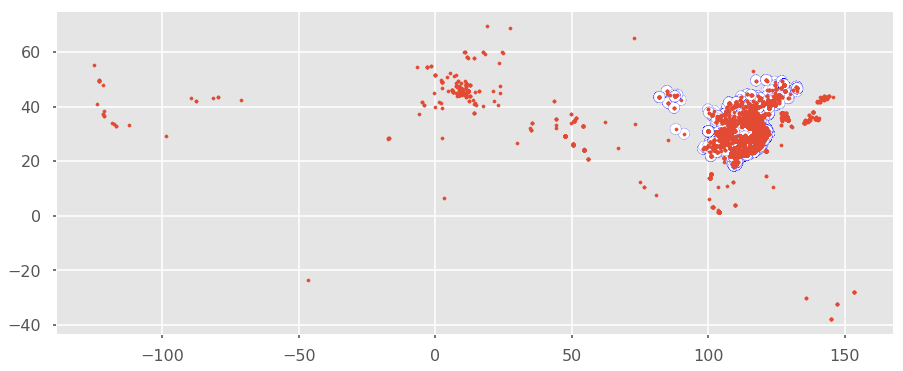

In [46]:
ax = china.plot(figsize=(15,15), color='white', linestyle=':', edgecolor='blue')
data.plot(ax=ax, markersize=10)

### Next I create my first Folium Map of China. Please feel welcome to change (copy and paste) the POINT coordinates below for any other country in the formula below to create your own country specific map

In [21]:
data.geometry.head()

0    POINT (117.71660 31.64696)
1    POINT (117.33190 31.77863)
2    POINT (117.22484 31.82831)
3    POINT (117.22484 31.82831)
4    POINT (117.56810 32.00123)
Name: geometry, dtype: geometry

In [22]:
# Create a map
china_anhui = folium.Map(location=[31.646960, 117.716600], tiles='openstreetmap', zoom_start=10)

# Display the map
china_anhui

### Several arguments customize the appearance of the map:

    location sets the initial center of the map. 
    tiles changes the styling of the map; in this case, we choose the OpenStreetMap style. If you're curious, you can explore the other options.
    zoom_start sets the initial level of zoom of the map, where higher values zoom in closer to the map.

### Take the time now to explore by zooming in and out, or by dragging the map in different directions.

## An interactive map where you can click on the markers to reveal confirmed cases by the country name.  

In [23]:
# Create a map
m = folium.Map(location=[31.646960, 117.716600], tiles='openstreetmap', zoom_start=2)

# Add points to the map
for idx, row in time_series_covid_19_confirmed.iterrows():
    Marker([row['Lat'], row['Long']], popup=row['Country/Region']).add_to(m)

# Display the map
m

## An interactive map where you can click on the markers to reveal the country name of where confirmed cases lead to deaths.

In [24]:
# Create a map
m1 = folium.Map(location=[31.646960, 117.716600], tiles='openstreetmap', zoom_start=2)

# Add points to the map
for idx, row in time_series_covid_19_deaths.iterrows():
    Marker([row['Lat'], row['Long']], popup=row['Country/Region']).add_to(m1)

# Display the map
m1

## An interactive map where you can click on the markers to reveal the country name of where confirmed cases went on to recover.

In [25]:
# Create a map
m2 = folium.Map(location=[31.646960, 117.716600], tiles='openstreetmap', zoom_start=2)

# Add points to the map
for idx, row in time_series_covid_19_recovered.iterrows():
    Marker([row['Lat'], row['Long']], popup=row['Country/Region']).add_to(m2)

# Display the map
m2

# Forecasting and Visualizing the predictions

### Here, I created my own version of the provided time series data where I found that some of the data were for early 2000's. I omitted these dates in my data imported below. 

In [26]:
import pandas as pd
COV19_time_confirmed = pd.read_csv("../input/cov19-time-series/COV19_time_confirmed.csv")
COV19_time_deaths = pd.read_csv("../input/cov19-time-series/COV19_time_deaths.csv")
COV19_time_recovered = pd.read_csv("../input/cov19-time-series/COV19_time_recovered.csv")

# First let's analyse at the confirmed cases and forecast and plot | visualize them.

### Create the model:

In [27]:
m = Prophet()
m.fit(COV19_time_confirmed)

### Set the future periods to 30 days to predict the rest of March (few days left in March)**

In [28]:
future = m.make_future_dataframe(periods=30)
future.tail()

ds
52 2020-03-26
53 2020-03-27
54 2020-03-28
55 2020-03-29
56 2020-03-30

In [29]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
52 2020-03-26  164760.143356  156241.932964  173101.932226
53 2020-03-27  166851.667184  158209.653384  175439.790074
54 2020-03-28  170410.411998  162018.987986  178835.159470
55 2020-03-29  174828.305530  165764.300945  183309.492520
56 2020-03-30  175972.458882  167686.013676  184219.998677

In [30]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds         yhat    yhat_lower    yhat_upper
0 2020-01-22 -5709.257079 -14428.739315   2930.752974
1 2020-01-23 -2877.274012 -11467.243652   5843.520873
2 2020-01-24  -774.924441  -9139.953568   7092.584491
3 2020-01-25  2794.646114  -5210.852256  11175.918372
4 2020-01-26  7223.365389  -1182.789126  15794.187720

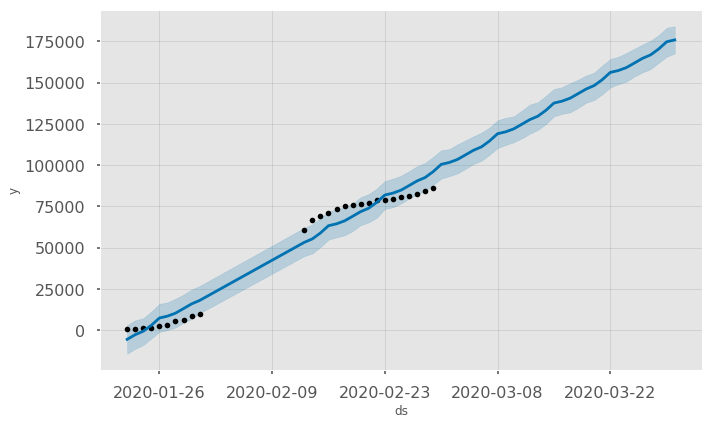

In [31]:
fig1 = m.plot(forecast)

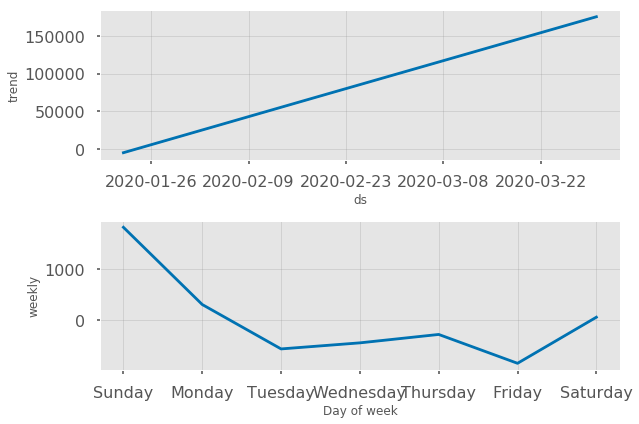

In [32]:
fig2 = m.plot_components(forecast)

### The following is an Interactive plot! Please move your mouse over the plot

In [33]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

# Next let's analyse the deaths and forecast and plot them

### Creating the model:

In [34]:
m1 = Prophet()
m1.fit(COV19_time_deaths)

### Set the future periods to 30 days to predict the rest of March (few left in March)**

In [35]:
future = m1.make_future_dataframe(periods=30)
future.tail()

ds
52 2020-03-26
53 2020-03-27
54 2020-03-28
55 2020-03-29
56 2020-03-30

In [36]:
forecast = m1.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
52 2020-03-26  5002.538044  4365.112331  5618.197748
53 2020-03-27  5056.672411  4389.282789  5710.536824
54 2020-03-28  5164.070106  4460.482445  5836.571362
55 2020-03-29  5227.885059  4479.499218  5946.918373
56 2020-03-30  5331.668899  4562.182679  6071.240955

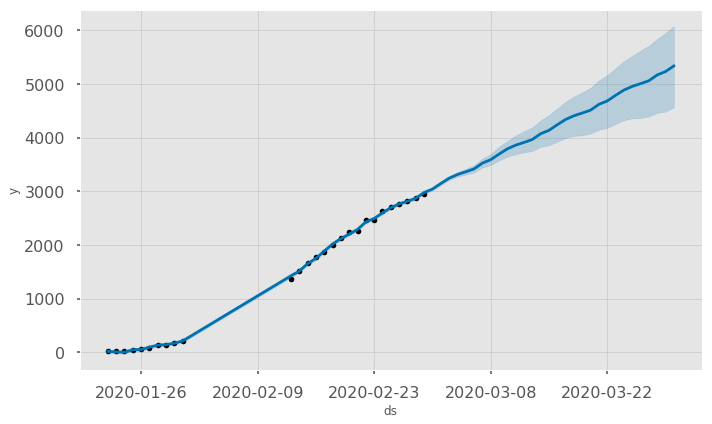

In [37]:
fig1 = m1.plot(forecast)

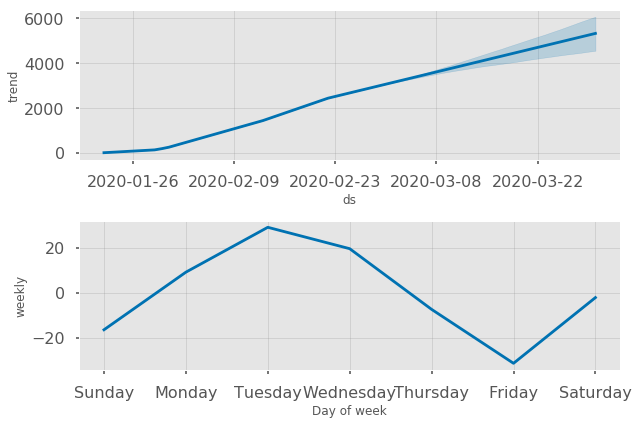

In [38]:
fig2 = m1.plot_components(forecast)

### And finaly we plot our interactive plot. Please feel welcome to move your mouse over the figure etc.

In [39]:
fig1 = plot_plotly(m1, forecast)  # This returns a plotly Figure
py.iplot(fig)

# Finaly we analyse the recovered cases and forecast and plot them

### Creating the model:

In [40]:
m2 = Prophet()
m2.fit(COV19_time_recovered)

### Set the future periods to 30 days (few left in March)****

In [41]:
future = m2.make_future_dataframe(periods=30)
future.tail()

ds
52 2020-03-26
53 2020-03-27
54 2020-03-28
55 2020-03-29
56 2020-03-30

#### The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.****

In [42]:
forecast = m2.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
52 2020-03-26  52157.746536  46638.782911  58494.473330
53 2020-03-27  53357.123705  47269.453895  59295.433916
54 2020-03-28  56064.586675  49888.174114  61718.388046
55 2020-03-29  53702.766335  47326.947965  60287.741811
56 2020-03-30  54889.760280  49412.941959  60455.179949

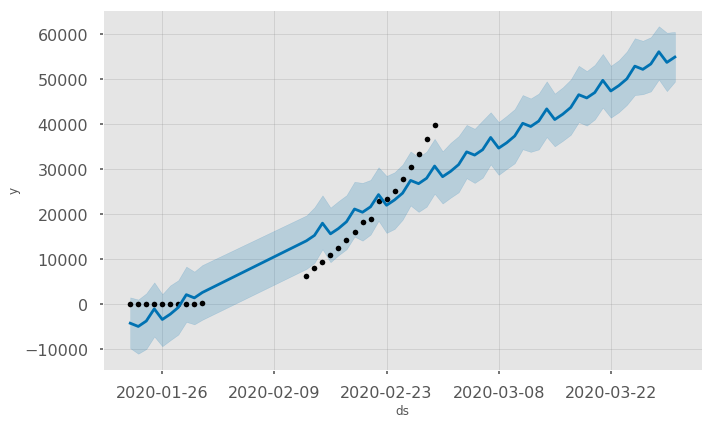

In [43]:
fig1 = m2.plot(forecast)

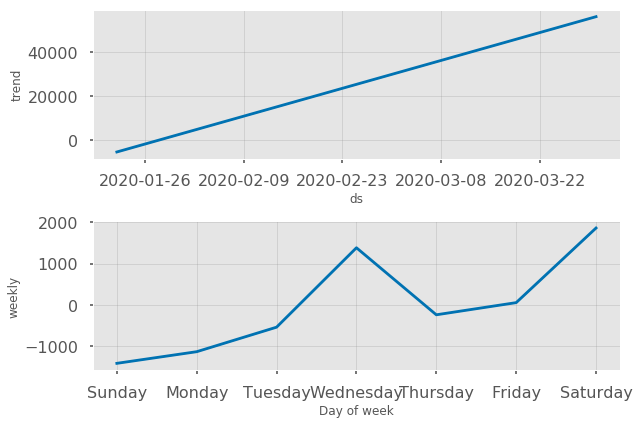

In [44]:
fig2 = m2.plot_components(forecast)

### And finaly we plot our interactive plot. Please feel welcome to move your mouse over the figure etc.

In [45]:
fig = plot_plotly(m2, forecast)  # This returns a plotly Figure
py.iplot(fig)

Thank you for reading my findings. All credits are due to:
Kaggle and Kaggle Learn for the oportuynity and their amazing Geospatial Analysis course where you learn to
'Create interactive maps, and discover patterns in geospatial data'.
Facebook.Prophet and their [GitHub](https://github.com/facebook/prophet) repository. 
The creators of all the libraries and especialy Folium for the maps and interactive maps etc and to John Hopkins University for providing us with the data etc. 